<a href="https://colab.research.google.com/github/emily0622/Python-Projects/blob/main/Visualizing_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of the project is to help visualize how the K-Means clustering algorithm identifies the cluster centroids and how the results are not always optimal

Many datasets don't have a gorund truth--meaning they don't have a set answer. In this example we will practice using a dataset with predefined categories. This project will be based on the BCG matrix which is a common business analysis tool comparing the relative market share of companies and market growth rate.

We need to install Sklearn version 0.23 to use a parameter and attribute in make_blobs to find the centroid generated


In [29]:
!pip install scikit-learn==0.23
import sklearn
print("sklearn: {}".format(sklearn.__version__))

sklearn: 0.23.0


In [30]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report, f1_score, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing
import pandas as pd

np.random.seed()


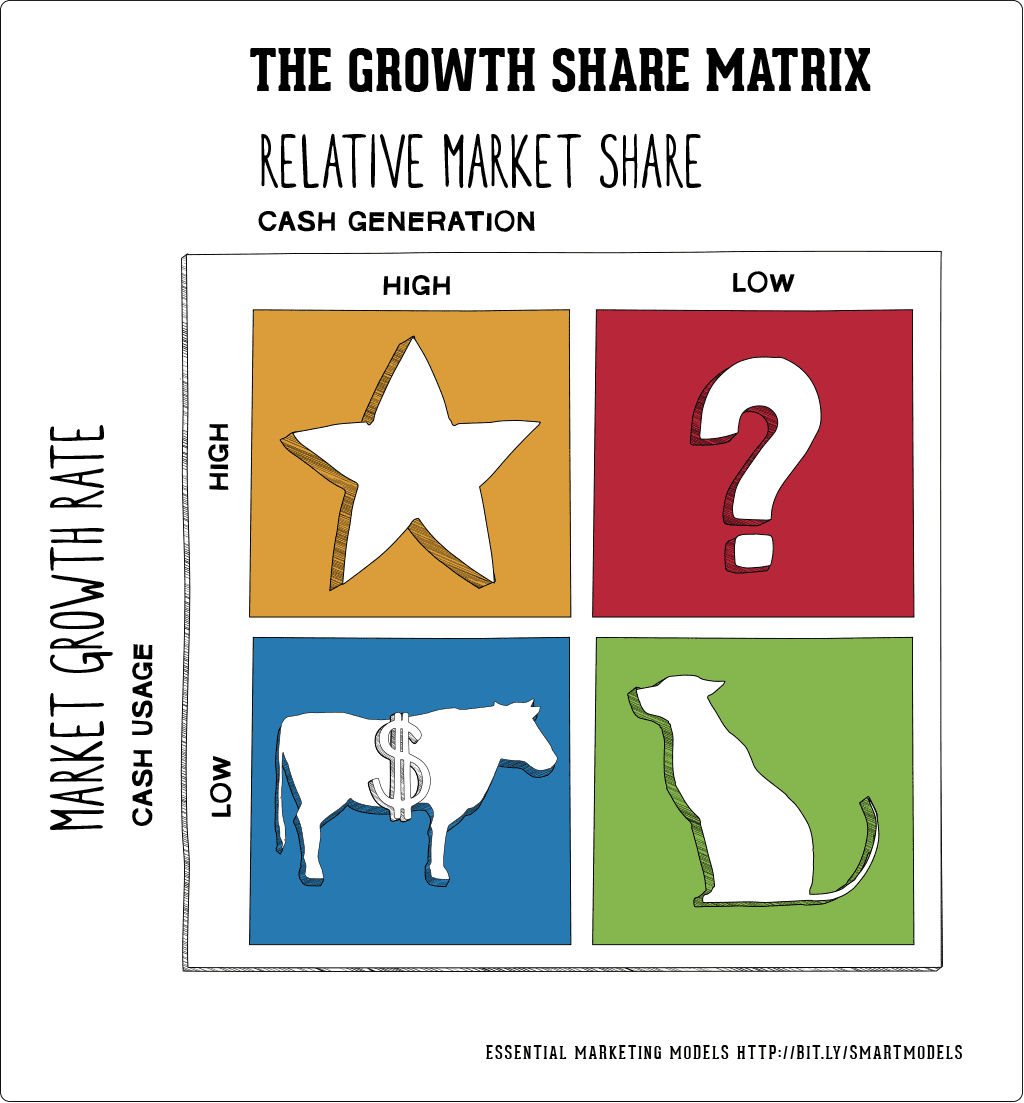

Text(0.5, 1.0, 'BCG Matrix Dataset')

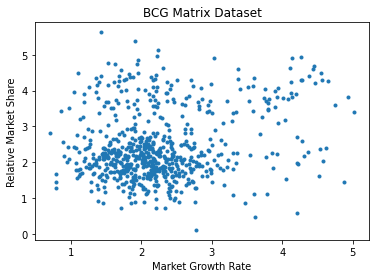

In [31]:
selected_centroids=[[2,2], [4,2], [4,4], [2,4]]
data_size = [500,30,50,100]
X, y, centers= make_blobs(n_samples=data_size, centers= selected_centroids,cluster_std=0.5, return_centers=True)


plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.xlabel("Market Growth Rate")
plt.ylabel("Relative Market Share")
plt.title("BCG Matrix Dataset")


In this generated dataset we assigned different numbers of companies in each category. We assumed that there is a large number of cash cows (which include companies like P&G), a few fast rising companies (like Zoom), a few more companies with high growth but low market share which includes startups, and dogs which are companies losing their market value.

Lets look at how K-Means identifies clusters without knowing the centroids ([2,2],[4,2],[4,4],2,4]), but assuming there are 4 clusters

In [32]:
Number_of_clusters = 4
k_means = KMeans(init = "k-means++", n_clusters = Number_of_clusters, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[1 1 0 3 0 0 0 3 0 0 3 0 0 0 3 0 1 0 0 2 3 2 0 2 2 1 0 0 1 1 0 0 2 1 0 3 2
 2 0 0 0 0 1 0 3 2 0 3 0 1 0 1 3 3 0 0 2 0 2 0 0 2 2 0 2 3 1 2 2 3 2 2 2 0
 1 0 0 0 0 1 0 2 2 0 0 2 0 1 3 3 2 2 2 0 2 1 0 2 1 0 0 1 3 2 0 0 1 0 0 0 0
 2 2 2 0 0 0 0 0 2 2 2 2 1 3 0 0 0 1 2 0 2 1 2 0 0 2 0 0 0 2 0 0 0 0 2 0 1
 0 1 0 2 3 2 0 2 0 3 3 0 2 0 3 0 2 0 3 0 3 0 0 0 3 3 0 0 0 0 0 2 3 2 2 0 2
 3 0 0 0 2 0 2 2 2 2 0 0 2 2 0 0 0 0 3 0 2 1 0 3 2 2 2 0 0 3 0 2 0 3 0 2 0
 0 1 0 2 1 0 0 0 2 2 0 0 0 0 0 3 1 2 3 0 0 0 0 0 0 0 2 3 2 2 2 0 3 0 0 2 0
 0 1 3 3 2 2 3 0 1 3 3 0 2 2 3 3 1 0 0 3 1 0 0 1 0 0 3 1 0 0 2 0 3 0 2 0 0
 2 3 0 0 2 0 2 2 0 2 2 3 0 1 2 0 2 2 1 2 3 2 3 0 0 2 0 0 0 0 1 2 3 0 0 2 2
 2 0 0 1 0 0 0 0 0 0 0 3 2 1 0 0 0 3 0 0 0 3 2 0 0 0 0 0 0 1 0 2 0 0 2 0 0
 3 3 0 2 0 3 1 0 0 0 0 0 2 2 2 1 2 1 2 3 0 2 0 3 0 0 1 0 0 0 0 0 2 0 1 3 2
 3 2 2 0 0 0 0 0 2 0 3 0 3 0 0 0 2 3 0 0 0 0 2 0 0 0 0 0 1 3 3 0 0 0 3 0 2
 0 2 2 0 0 0 2 2 2 0 1 0 2 0 2 0 3 0 3 3 2 3 3 0 0 0 1 0 1 0 0 0 0 0 3 0 0
 0 0 1 2 0 2 0 3 0 0 0 0 

The labels are given values from 0 to 3 just like the true labels, however the given labels may not assign the same label for the same attribute. Thus we will change the labels to correspond with the groundtruth.
However, when using make_blobs it generates 

In [33]:
import math
#define which calculated cluster centroid belongs to which true cluster centroid
assigned_labels = k_means.predict(selected_centroids)
print(assigned_labels)
print(centers)

count_0=0
count_1=1
count_2=2
count_3=3
for point in y:
  if point == 0:
      count_0 += 1
  elif point == 1:
      count_1 += 1
  elif point == 2:
      count_2 += 1
  else:
      count_3 += 1

print(count_0,count_1,count_2,count_3)
print(data_size)
data_size = [500,30,50,100]

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

counts = [count_0,count_1,count_2,count_3]
dict_mapping_assigned_to_true_labels = {}

for values in counts:
  for i in range(4):
    nearest_to_selected_num = find_nearest(counts,data_size[i])
    count_num_index = counts.index(nearest_to_selected_num)
    dict_mapping_assigned_to_true_labels[data_size[i]] = (count_num_index,assigned_labels[i])

#so the first number is the label assigned by make_blobs and assigned_labels by kmeans
print(dict_mapping_assigned_to_true_labels)

#for label in labels:
#  change_to = list(mydict.keys())[list(mydict.values()).index(16)]


#for label in labels:

# for trial in range(4):
#   kmeans.predict(selected_centroids[0])
# label_dict = {cash_cows: []}


#identify given label
#switch given label for true label

[0 2 1 3]
[[2 2]
 [4 2]
 [4 4]
 [2 4]]
500 31 52 103
[500, 30, 50, 100]
{500: (0, 0), 30: (1, 2), 50: (2, 1), 100: (3, 3)}


In [34]:
# diction ={}
# diction["meep"] = 0 ,1
# print("now")
# print(diction["meep"][0])
# print((list(diction.values())[0].index(0)))


# print(diction)

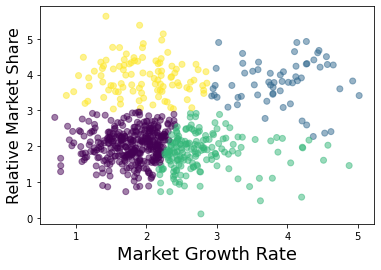

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Market Growth Rate', fontsize=18)
plt.ylabel('Relative Market Share', fontsize=16)

plt.show()



Lets analyze the accuracy using a confusion martix

In [36]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
#cnf_m = confusion_matrix(y,labels,labels=[2,4])
#disp = ConfusionMatrixDisplay(cnf_m, display_labels=None)
#disp.plot()